In [11]:
# libraries
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

path = "./Brightkite_edges.txt"

In [12]:

#get the datas
with open(path) as f:
    raw_datas = f.read()
    first_elaboration = raw_datas.split("\n")

act_datas={}
for d in first_elaboration:
    if(d!=''):
        tmp = d.split("\t")
        if tmp[0] in act_datas.keys():
            act_datas[tmp[0]].append((tmp[0],tmp[1]))
        else:
            act_datas[tmp[0]] = [(tmp[0],tmp[1])]

act_datas

{'0': [('0', '1'),
  ('0', '2'),
  ('0', '3'),
  ('0', '4'),
  ('0', '5'),
  ('0', '6'),
  ('0', '7'),
  ('0', '8'),
  ('0', '9'),
  ('0', '10'),
  ('0', '11'),
  ('0', '12'),
  ('0', '13'),
  ('0', '14'),
  ('0', '15'),
  ('0', '16'),
  ('0', '17'),
  ('0', '18'),
  ('0', '19'),
  ('0', '20'),
  ('0', '21'),
  ('0', '22'),
  ('0', '23'),
  ('0', '24'),
  ('0', '25'),
  ('0', '26'),
  ('0', '27'),
  ('0', '28'),
  ('0', '29'),
  ('0', '30'),
  ('0', '31'),
  ('0', '32'),
  ('0', '33'),
  ('0', '34'),
  ('0', '35'),
  ('0', '36'),
  ('0', '37'),
  ('0', '38'),
  ('0', '39'),
  ('0', '40'),
  ('0', '41'),
  ('0', '42'),
  ('0', '43'),
  ('0', '45'),
  ('0', '46'),
  ('0', '47'),
  ('0', '48'),
  ('0', '49'),
  ('0', '50'),
  ('0', '51'),
  ('0', '52'),
  ('0', '53'),
  ('0', '54'),
  ('0', '55'),
  ('0', '56'),
  ('0', '57'),
  ('0', '58'),
  ('0', '59'),
  ('0', '60'),
  ('0', '61'),
  ('0', '62'),
  ('0', '63'),
  ('0', '65'),
  ('0', '66'),
  ('0', '67'),
  ('0', '68'),
  ('0', '69'),

In [13]:
G = nx.Graph()
nodes = act_datas.keys()
G.add_nodes_from(act_datas.keys())
for k in nodes:
    G.add_edges_from(act_datas[k])


In [14]:
print("Numero di nodi: "+str(G.number_of_nodes()))
print("Numero di archi: "+str(G.number_of_edges()))
print("Il grafo è connesso? "+str(nx.is_connected(G)))
print("Componenti connesse: "+ str(nx.number_connected_components(G)))

#print("Componenti connesse: ")
lista_componenti_connesse = list(nx.connected_components(G))





Numero di nodi: 58228
Numero di archi: 214078
Il grafo è connesso? False
Componenti connesse: 547


Il grafo non è connesso

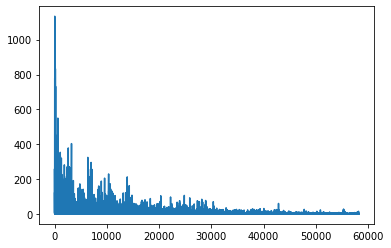

In [15]:
degrees = []
for n in nodes:
    degrees.append(G.degree[n])
plt.plot(degrees)
plt.show()



Probabilmente i primi nodi saranno più centrali

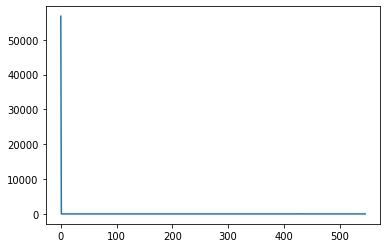

In [16]:
connected_components_sizes = []
for l in lista_componenti_connesse:
    connected_components_sizes.append(len(l))
plt.plot(connected_components_sizes)
plt.show()

403


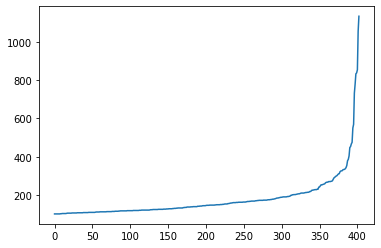

In [17]:
degrees_th = []
th = 100
for n in nodes:
    d = G.degree[n]
    if(d>th):
        degrees_th.append(d)
print(len(degrees_th))
degrees_th.sort()
plt.plot(degrees_th)
plt.show()

In [18]:
max_degree_node = max(G.nodes, key=G.degree)
act_datas[max_degree_node]


[('40', '0'),
 ('40', '1'),
 ('40', '2'),
 ('40', '5'),
 ('40', '6'),
 ('40', '7'),
 ('40', '9'),
 ('40', '11'),
 ('40', '12'),
 ('40', '20'),
 ('40', '23'),
 ('40', '25'),
 ('40', '26'),
 ('40', '30'),
 ('40', '36'),
 ('40', '41'),
 ('40', '42'),
 ('40', '43'),
 ('40', '45'),
 ('40', '46'),
 ('40', '47'),
 ('40', '50'),
 ('40', '51'),
 ('40', '54'),
 ('40', '56'),
 ('40', '58'),
 ('40', '61'),
 ('40', '69'),
 ('40', '71'),
 ('40', '74'),
 ('40', '76'),
 ('40', '103'),
 ('40', '123'),
 ('40', '133'),
 ('40', '135'),
 ('40', '143'),
 ('40', '144'),
 ('40', '146'),
 ('40', '148'),
 ('40', '149'),
 ('40', '150'),
 ('40', '152'),
 ('40', '154'),
 ('40', '155'),
 ('40', '156'),
 ('40', '158'),
 ('40', '159'),
 ('40', '160'),
 ('40', '162'),
 ('40', '163'),
 ('40', '167'),
 ('40', '168'),
 ('40', '170'),
 ('40', '180'),
 ('40', '181'),
 ('40', '182'),
 ('40', '183'),
 ('40', '190'),
 ('40', '191'),
 ('40', '195'),
 ('40', '199'),
 ('40', '207'),
 ('40', '208'),
 ('40', '209'),
 ('40', '210')

In [19]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])

In [20]:
print("Numero di nodi: "+str(G0.number_of_nodes()))
print("Numero di archi: "+str(G0.number_of_edges()))
print("Il grafo è connesso? "+str(nx.is_connected(G0)))
print("Componenti connesse: "+ str(nx.number_connected_components(G0)))

#print("Componenti connesse: ")
lista_componenti_connesse = list(nx.connected_components(G0))

print("Diff nodi: "+str(G.number_of_nodes()-G0.number_of_nodes()))
print("Diff archi: "+str(G.number_of_edges()-G0.number_of_edges()))

#print("Componenti connesse: ")
lista_componenti_connesse = list(nx.connected_components(G0))


Numero di nodi: 56739
Numero di archi: 212945
Il grafo è connesso? True
Componenti connesse: 1
Diff nodi: 1489
Diff archi: 1133
